# Let's Begin

### Importing all the libraries that might be need pre-emtively.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

**Reading the data set to being with understanding it and then processing it.**

In [2]:
data = pd.read_csv('/Users/virensasalu/Documents/coding/UOA Coding Files/Course 3/German bank/german bank dataset.csv') 
data.head(10)

checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   
5          unknown                    36           good             education   
6          unknown                    24           good  furniture/appliances   
7       1 - 200 DM                    36           good                   car   
8          unknown                    12           good  furniture/appliances   
9       1 - 200 DM                    30       critical                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   
5    9055         unknown         1 - 4 years                  2   
6    2835   500 - 1000 DM           > 7 years                  3   
7    6948        < 100 DM         1 - 4 years                  2   
8    3059       > 1000 DM         4 - 7 years                  2   
9    5234        < 100 DM          unemployed                  4   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   
5                   4   35         none   other                     1   
6                   4   53         none     own                     1   
7                   2   35         none    rent                     1   
8                   4   61         none     own                     1   
9                   2   28         none     own                     2   

          job  dependents phone default  
0     skilled           1   yes      no  
1     skilled           1    no     yes  
2   unskilled           2    no      no  
3     skilled           2    no      no  
4     skilled           2    no     yes  
5   unskilled           2   yes      no  
6     skilled           1    no      no  
7  management           1   yes      no  
8   unskilled           1    no      no  
9  management           1    no     yes

# Pre-Processing

**Checking the data in depth to make sure there no anomalies**

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [4]:
print(data.isnull().sum())

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64


In [5]:
for column in data.columns:
    unique_values = (data[column].unique().sum())
    print(f"Unique values in {column}:{unique_values}")

Unique values in checking_balance:< 0 DM1 - 200 DMunknown> 200 DM
Unique values in months_loan_duration:862
Unique values in credit_history:criticalgoodpoorperfectvery good
Unique values in purpose:furniture/applianceseducationcarbusinessrenovationscar0
Unique values in amount:3118140
Unique values in savings_balance:unknown< 100 DM500 - 1000 DM> 1000 DM100 - 500 DM
Unique values in employment_duration:> 7 years1 - 4 years4 - 7 yearsunemployed< 1 year
Unique values in percent_of_income:10
Unique values in years_at_residence:10
Unique values in age:2394
Unique values in other_credit:nonebankstore
Unique values in housing:ownotherrent
Unique values in existing_loans_count:10
Unique values in job:skilledunskilledmanagementunemployed
Unique values in dependents:3
Unique values in phone:yesno
Unique values in default:noyes


In [6]:
data.describe(include=['O']).T

count unique                   top freq
checking_balance     1000      4               unknown  394
credit_history       1000      5                  good  530
purpose              1000      6  furniture/appliances  473
savings_balance      1000      5              < 100 DM  603
employment_duration  1000      5           1 - 4 years  339
other_credit         1000      3                  none  814
housing              1000      3                   own  713
job                  1000      4               skilled  630
phone                1000      2                    no  596
default              1000      2                    no  700

In [7]:
data.describe().T

count      mean          std    min     25%     50%  \
months_loan_duration  1000.0    20.903    12.058814    4.0    12.0    18.0   
amount                1000.0  3271.258  2822.736876  250.0  1365.5  2319.5   
percent_of_income     1000.0     2.973     1.118715    1.0     2.0     3.0   
years_at_residence    1000.0     2.845     1.103718    1.0     2.0     3.0   
age                   1000.0    35.546    11.375469   19.0    27.0    33.0   
existing_loans_count  1000.0     1.407     0.577654    1.0     1.0     1.0   
dependents            1000.0     1.155     0.362086    1.0     1.0     1.0   

                          75%      max  
months_loan_duration    24.00     72.0  
amount                3972.25  18424.0  
percent_of_income        4.00      4.0  
years_at_residence       4.00      4.0  
age                     42.00     75.0  
existing_loans_count     2.00      4.0  
dependents               1.00      2.0

**Insights:**
- There is no missing values in an column
- Data types appears to be 'object' and 'int64'
- Unique values describe there one anomally that is car0
- there are significant 'unknown' since the category is no nominal i have decided not to drop and act upon it. 

**Cleaning up the dataset, getting rid of all the anomalies**

In [8]:
data['purpose'] = data['purpose'].replace('car0', 'car')

**I decided to use raw data to data visualisation and make another copy for processed data**

In [9]:
ProcessedBankData = data.copy()
Datavis = data.copy()
Datavis.head()

checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   

         job  dependents phone default  
0    skilled           1   yes      no  
1    skilled           1    no     yes  
2  unskilled           2    no      no  
3    skilled           2    no      no  
4    skilled           2    no     yes

**Mapping the dataset to fit the models**

In [10]:
ProcessedBankData['default'] = (ProcessedBankData['default'] == 'yes').astype(int)
ProcessedBankData['phone'] = (ProcessedBankData['phone'] == 'yes').astype(int)

job_mapping = {'skilled': 2, 'unskilled': 1, 'management': 3, 'unemployed': 0}
ProcessedBankData['job'] = ProcessedBankData['job'].map(job_mapping).astype(int)

other_credit_mapping = {'none': 0, 'bank': 1, 'store': 2}
ProcessedBankData['other_credit'] = ProcessedBankData['other_credit'].map(other_credit_mapping).astype(int)

credit_historymapping = {'good': 2, 'poor': 1, 'critical': 0, 'very good': 3, 'perfect': 4}
ProcessedBankData['credit_history'] = ProcessedBankData['credit_history'].map(credit_historymapping).astype(int)

checking_balancemapping = {'1 - 200 DM': 1, '< 0 DM': 0, '> 200 DM': 2, 'unknown': 3}
ProcessedBankData['checking_balance'] = ProcessedBankData['checking_balance'].map(checking_balancemapping).astype(int)

savings_balancemapping = {'< 100 DM': 0, '100 - 500 DM': 1, '500 - 1000 DM': 2, '> 1000 DM': 3, 'unknown': 4}
ProcessedBankData['savings_balance'] = ProcessedBankData['savings_balance'].map(savings_balancemapping).astype(int)

purposemapping = {'furniture/appliances': 0, 'car': 2, 'business': 4, 'renovations': 3, 'education': 1}
ProcessedBankData['purpose'] = ProcessedBankData['purpose'].map(purposemapping).astype(int)

employment_durationmapping = {'1 - 4 years': 2, '4 - 7 years': 3, 'unemployed': 0, '< 1 year': 1, '> 7 years': 4} 
ProcessedBankData['employment_duration'] = ProcessedBankData['employment_duration'].map(employment_durationmapping).astype(int)

housingmapping = {'own': 0, 'other': 1, 'rent': 2}
ProcessedBankData['housing'] = ProcessedBankData['housing'].map(housingmapping).astype(int)



ProcessedBankData.head()

#This step was done before, In the report I have mentioned it later. 

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 0                     6               0        0    1169   
1                 1                    48               2        0    5951   
2                 3                    12               0        1    2096   
3                 0                    42               2        0    7882   
4                 0                    24               1        2    4870   

   savings_balance  employment_duration  percent_of_income  \
0                4                    4                  4   
1                0                    2                  2   
2                0                    3                  2   
3                0                    3                  2   
4                0                    2                  3   

   years_at_residence  age  other_credit  housing  existing_loans_count  job  \
0                   4   67             0        0                     2    2   
1                   2   22             0        0                     1    2   
2                   3   49             0        0                     1    1   
3                   4   45             0        1                     1    2   
4                   4   53             0        1                     2    2   

   dependents  phone  default  
0           1      1        0  
1           1      0        1  
2           2      0        0  
3           2      0        0  
4           2      0        1

**Insights:**

- I have mapped all the data to 0,1,2,3,4 so that I can use the numerical attributes to fit my ML modes
- I created another copy; 'Datavis' strictly to visualise the data and have a better structured understanding 

# Exploratory Data Analysis for Bank data

**Making more sense of the data by drafting graphs and learning the relationship between each attributes**
- Lets look into the numnerical describtion of the data
- some feature analysis with pair-plot
- more graphical understanding
- co- relation between default and other attributes

In [11]:
ProcessedBankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int64
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int64
 3   purpose               1000 non-null   int64
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int64
 6   employment_duration   1000 non-null   int64
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int64
 11  housing               1000 non-null   int64
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int64
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int64
 16  default

**My Apporach:**
- Decided to create a numerical feature list. 
- Selected some attributes I think might give me some analysis
- More depth and detailed analysis

**PairPlot (numerical features only)**

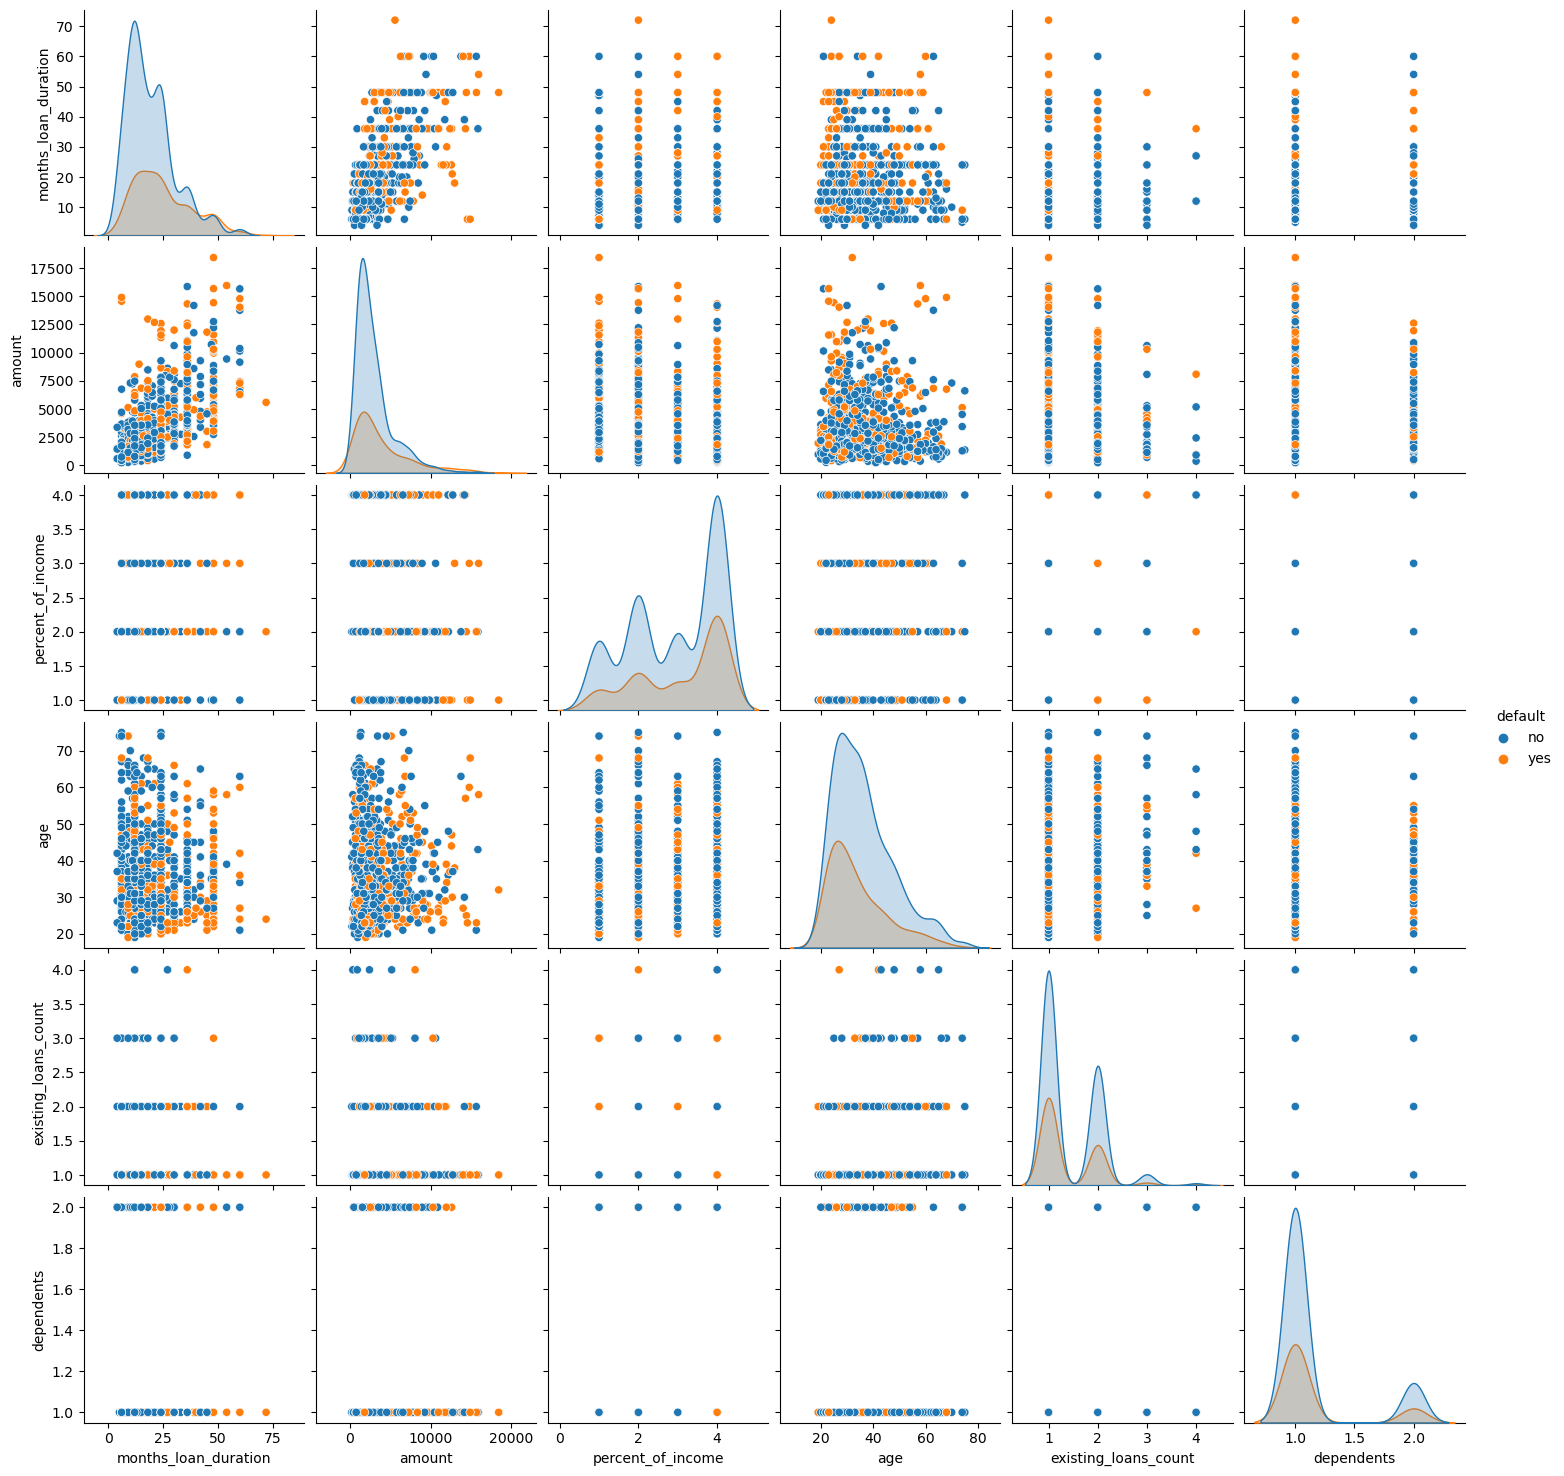

No: 0
Yes: 1


In [12]:
Features = ['months_loan_duration', 'amount', 'percent_of_income', 'age', 'existing_loans_count', 'dependents']
sns.pairplot(Datavis, hue='default', vars=Features)
plt.show()
print('No: 0')
print('Yes: 1')

In [13]:
import plotly.express as px

fig = px.scatter(Datavis, x='credit_history', y='amount', color='default')
fig.show()

**Heatmap and Correlation matrix**

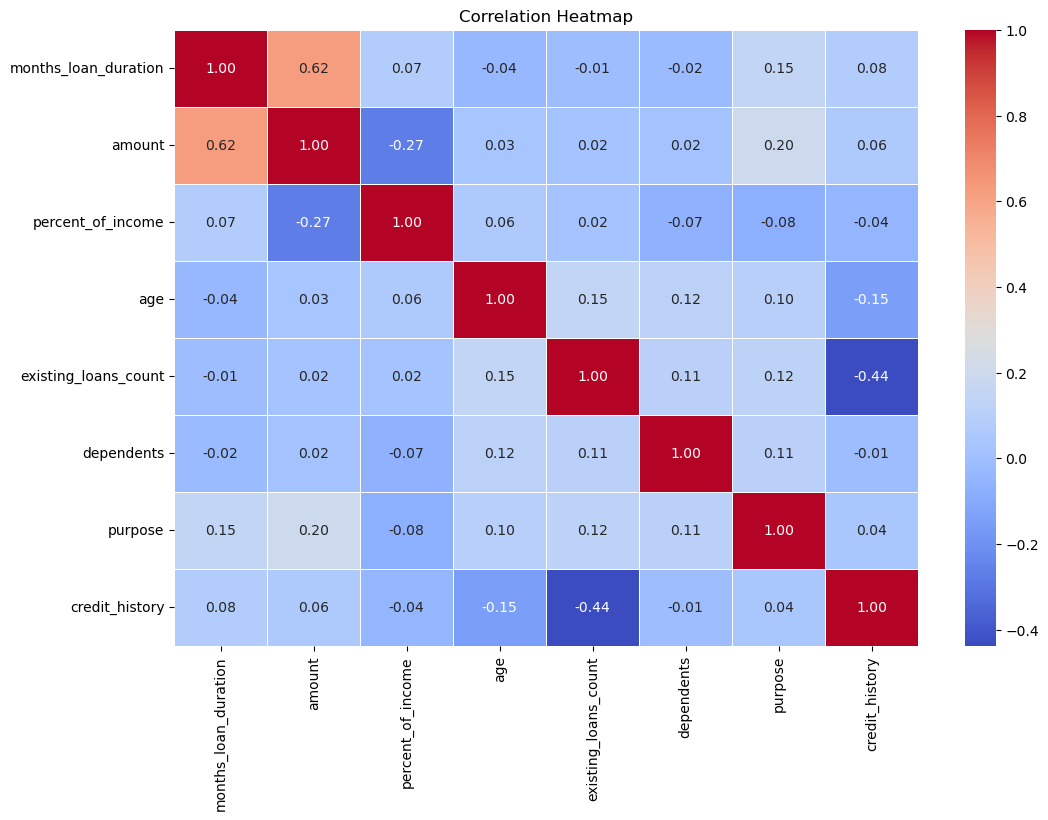

In [14]:
corr_matrix = ProcessedBankData[['months_loan_duration', 'amount', 'percent_of_income', 'age', 'existing_loans_count', 'dependents', 'purpose', 'credit_history']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
corr_matrix

months_loan_duration    amount  percent_of_income  \
months_loan_duration              1.000000  0.624984           0.074749   
amount                            0.624984  1.000000          -0.271316   
percent_of_income                 0.074749 -0.271316           1.000000   
age                              -0.036136  0.032716           0.058266   
existing_loans_count             -0.011284  0.020795           0.021669   
dependents                       -0.023834  0.017142          -0.071207   
purpose                           0.148723  0.198534          -0.077530   
credit_history                    0.077186  0.059905          -0.044375   

                           age  existing_loans_count  dependents   purpose  \
months_loan_duration -0.036136             -0.011284   -0.023834  0.148723   
amount                0.032716              0.020795    0.017142  0.198534   
percent_of_income     0.058266              0.021669   -0.071207 -0.077530   
age                   1.000000              0.149254    0.118201  0.101045   
existing_loans_count  0.149254              1.000000    0.109667  0.121013   
dependents            0.118201              0.109667    1.000000  0.109593   
purpose               0.101045              0.121013    0.109593  1.000000   
credit_history       -0.147086             -0.437066   -0.011550  0.037127   

                      credit_history  
months_loan_duration        0.077186  
amount                      0.059905  
percent_of_income          -0.044375  
age                        -0.147086  
existing_loans_count       -0.437066  
dependents                 -0.011550  
purpose                     0.037127  
credit_history              1.000000

**Box plot, density and histogram with hue= default**

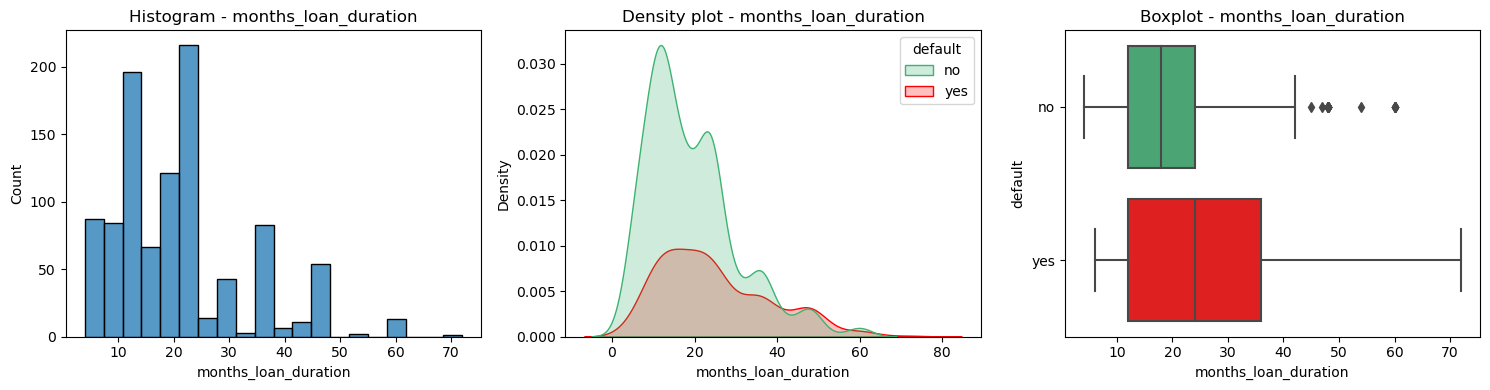

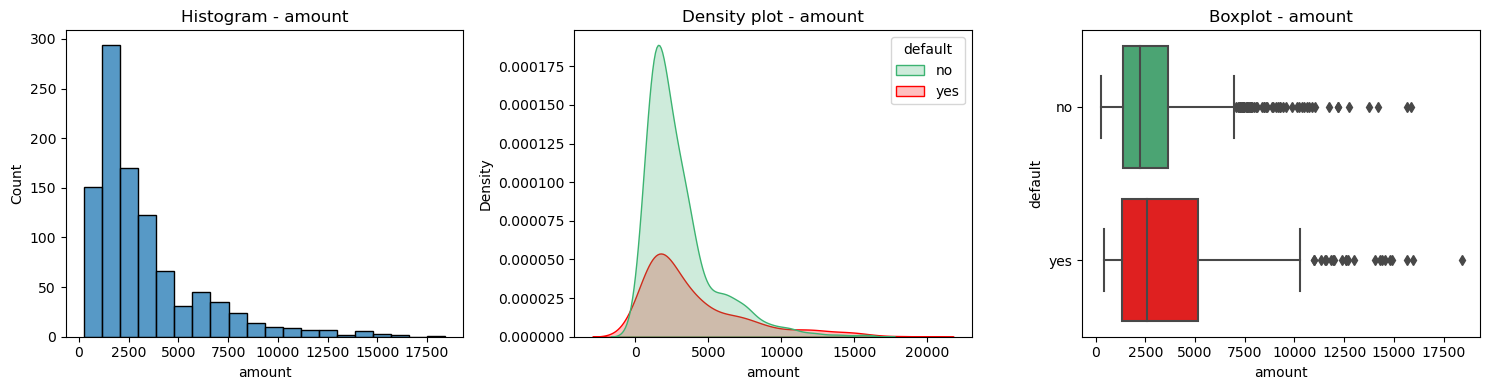

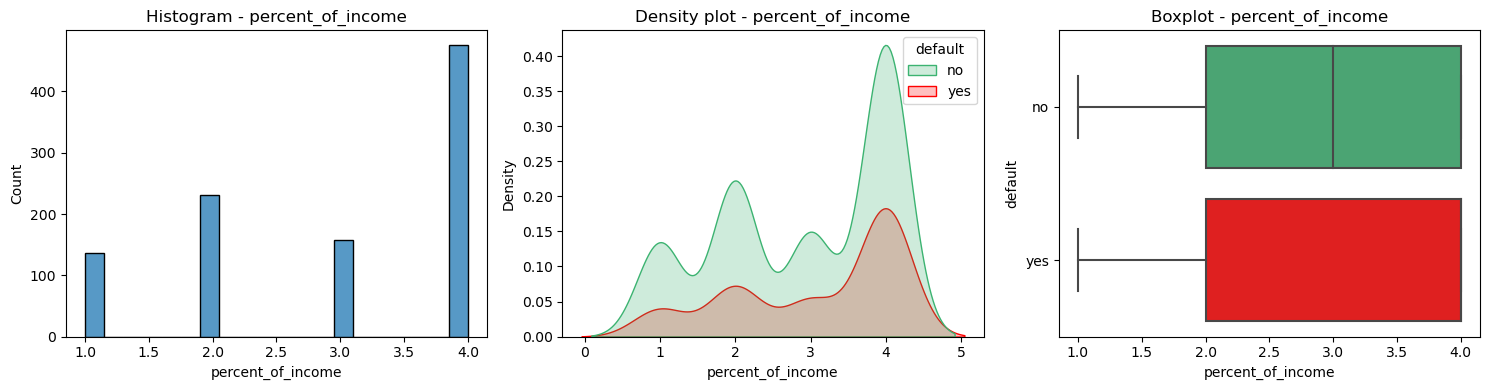

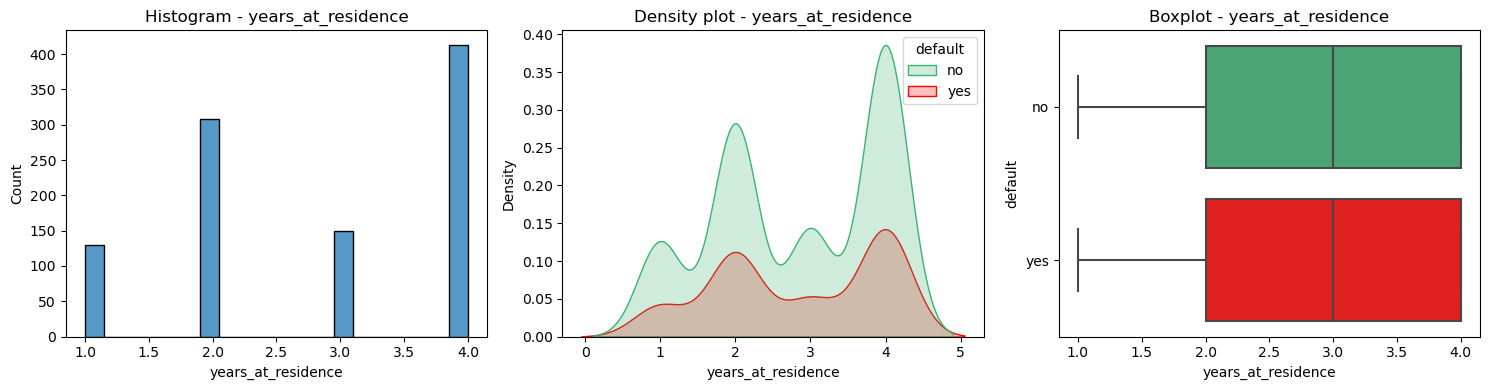

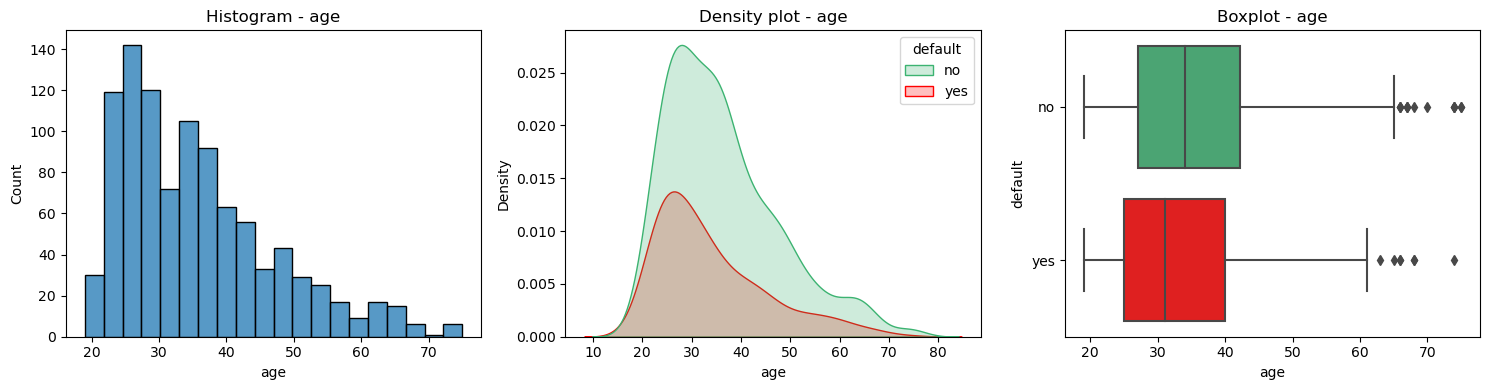

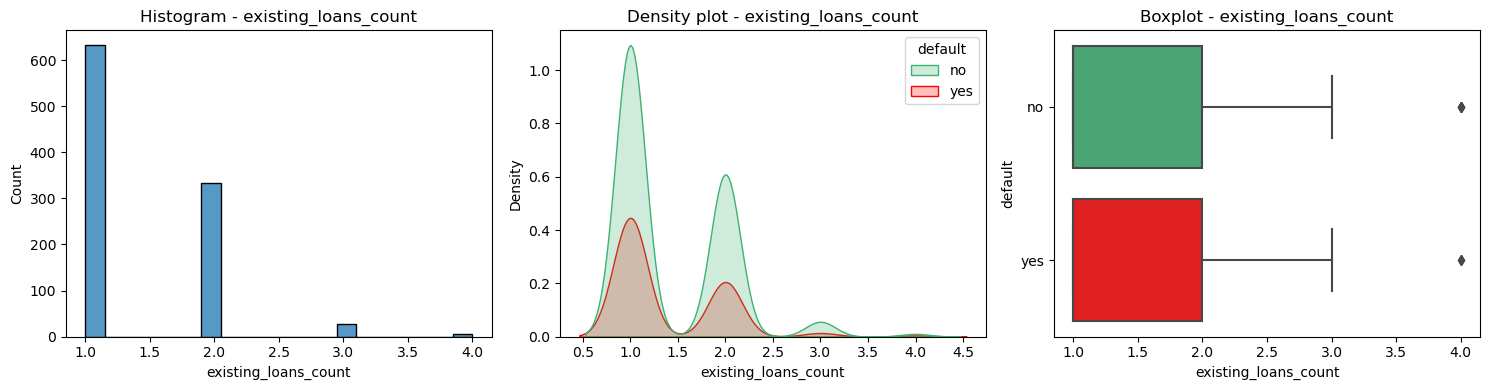

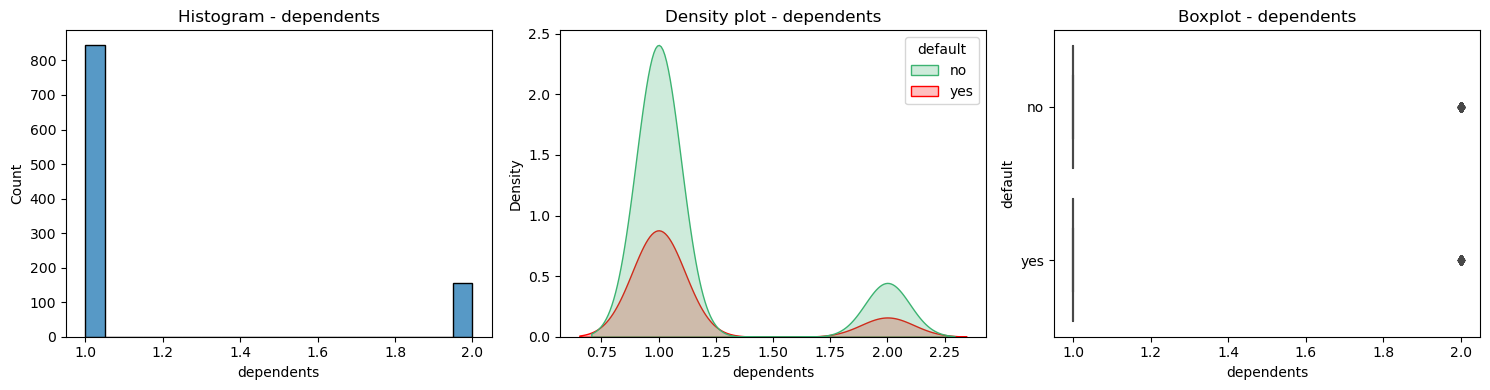

In [16]:
SelectedCol = Datavis[['months_loan_duration','amount', 'percent_of_income','years_at_residence', 'age', 'existing_loans_count','dependents']]
for sel in SelectedCol.columns:
   
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
   #Count plot without hue='default' (sort by descending order)
    sns.histplot(data=Datavis, x=sel, ax=ax1, bins=20, kde=False)
    ax1.set_title(f'Histogram - {sel}')
    
    
    sns.kdeplot(data=Datavis, x=sel, hue='default', ax=ax2, fill=True,
                palette={'yes': 'red', 'no': 'mediumseagreen'})
      #Count plot with hue='default' (sort by descending order)
    ax2.set_title(f'Density plot - {sel}')
    sns.boxplot(data=Datavis, x=sel, y='default', ax=ax3,
                palette={'yes': 'red', 'no': 'mediumseagreen'})
    
    ax3.set_title(f'Boxplot - {sel}')
    plt.tight_layout()
    plt.show()

**Count plot of all the features without default**

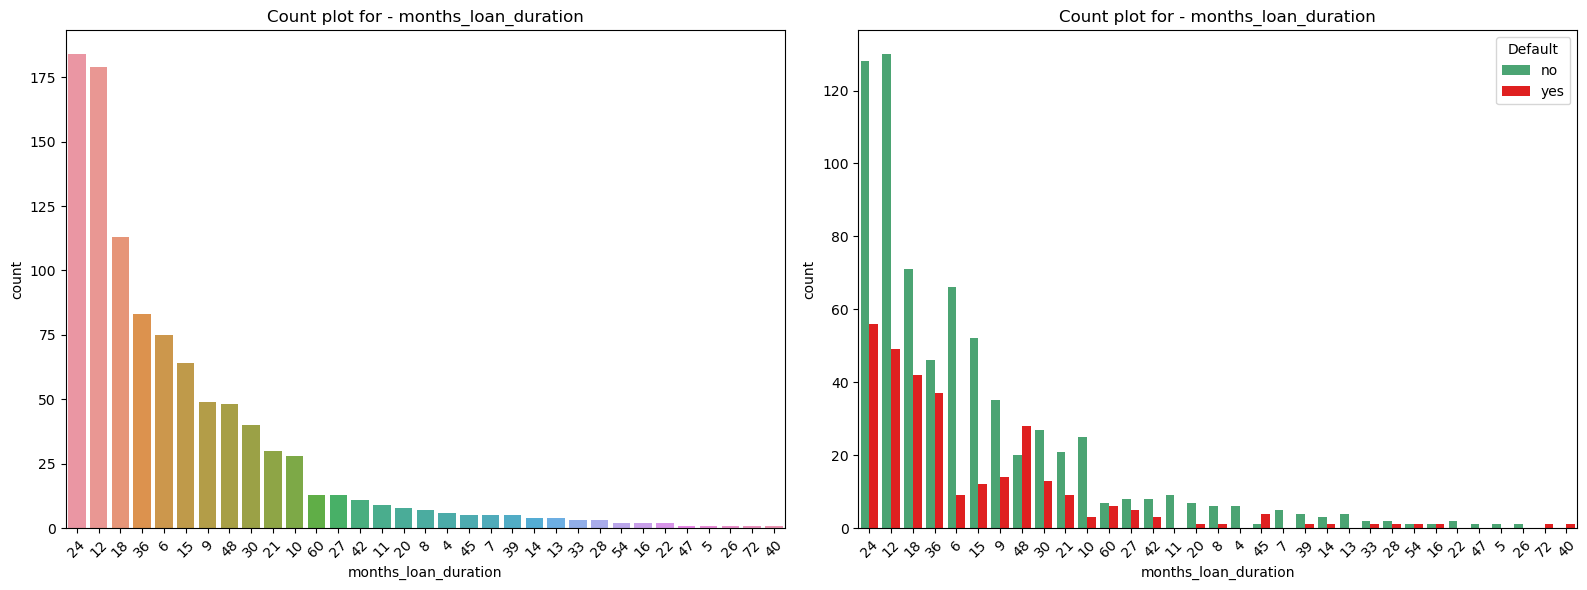

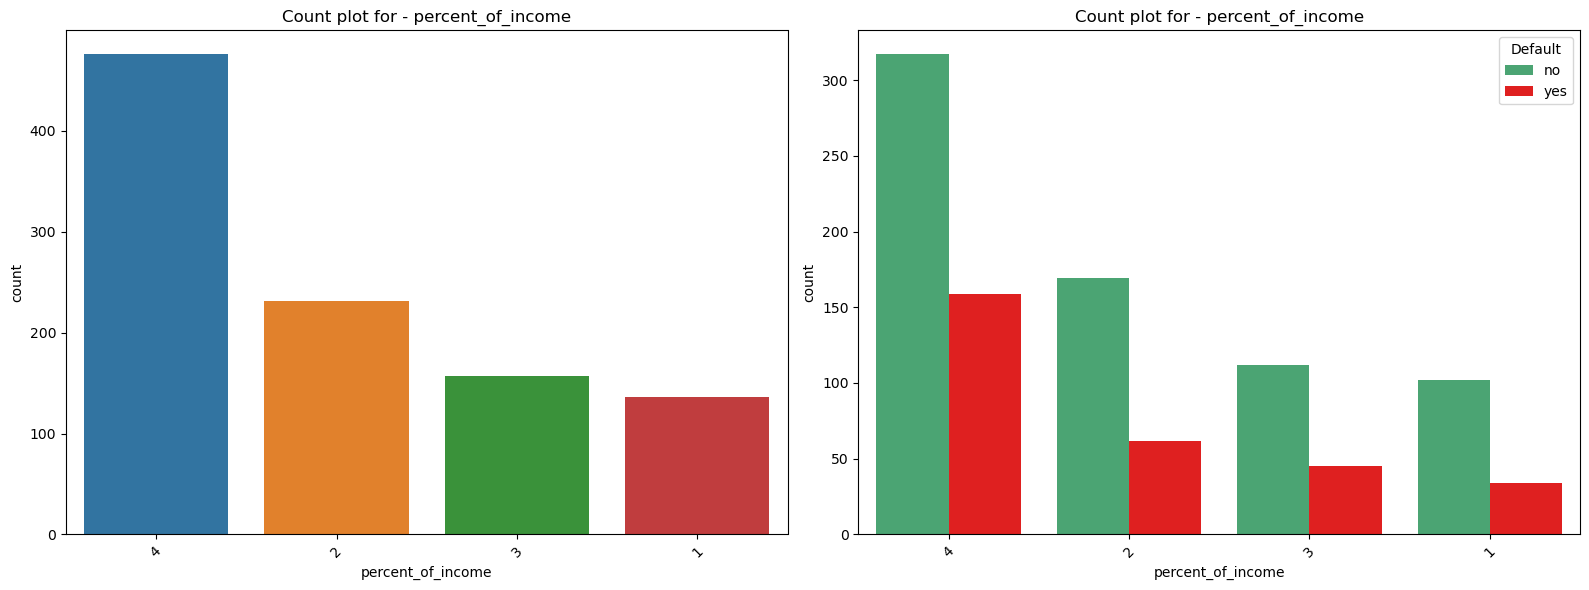

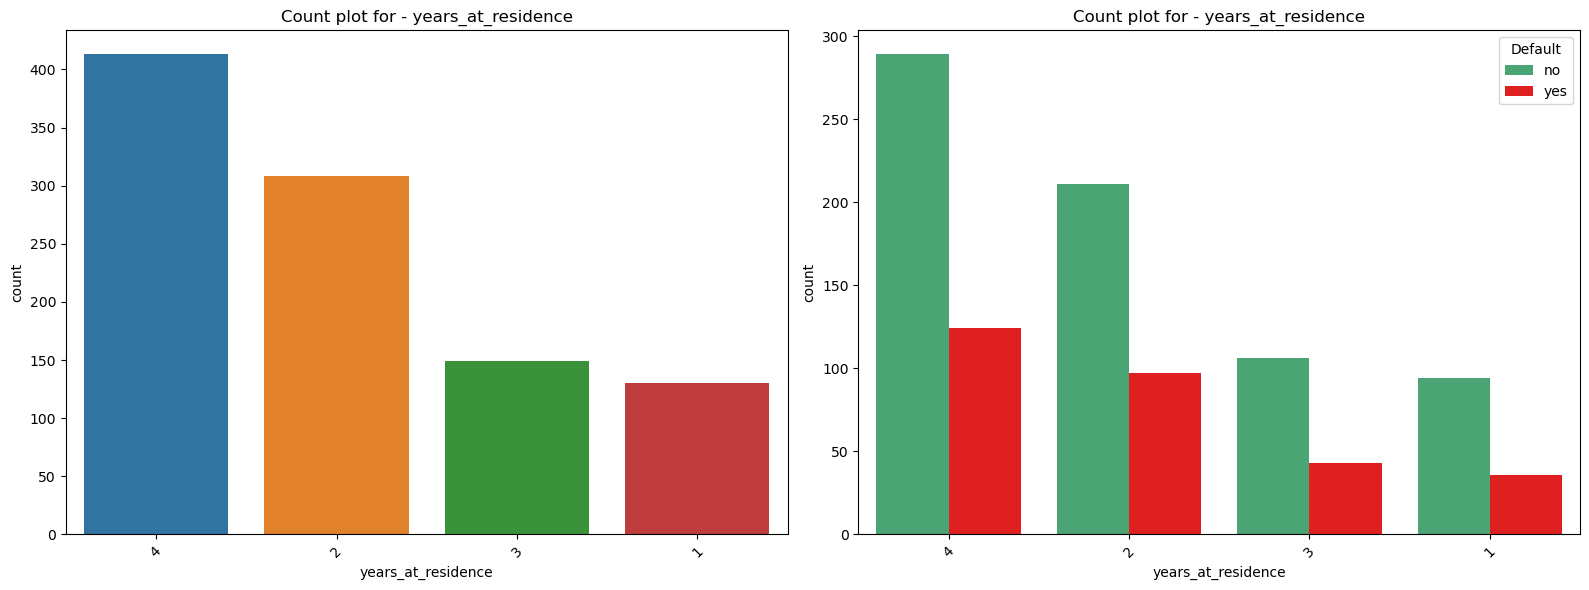

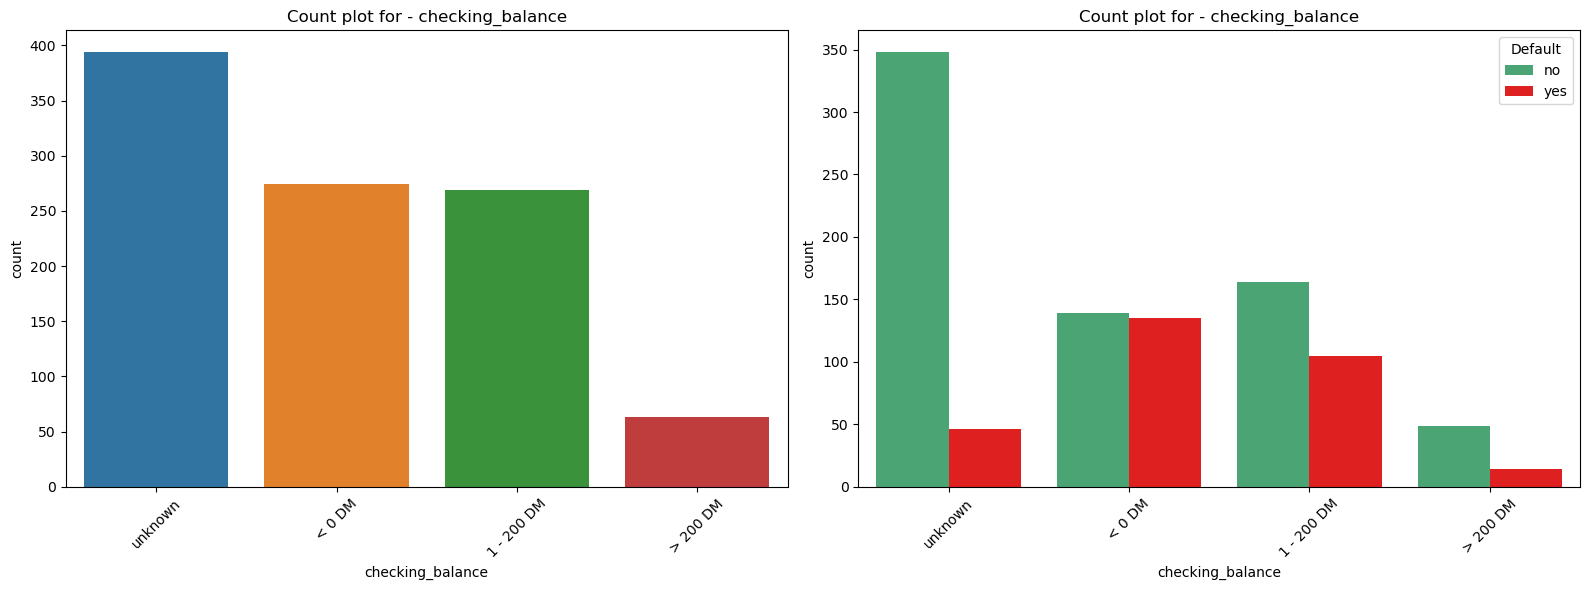

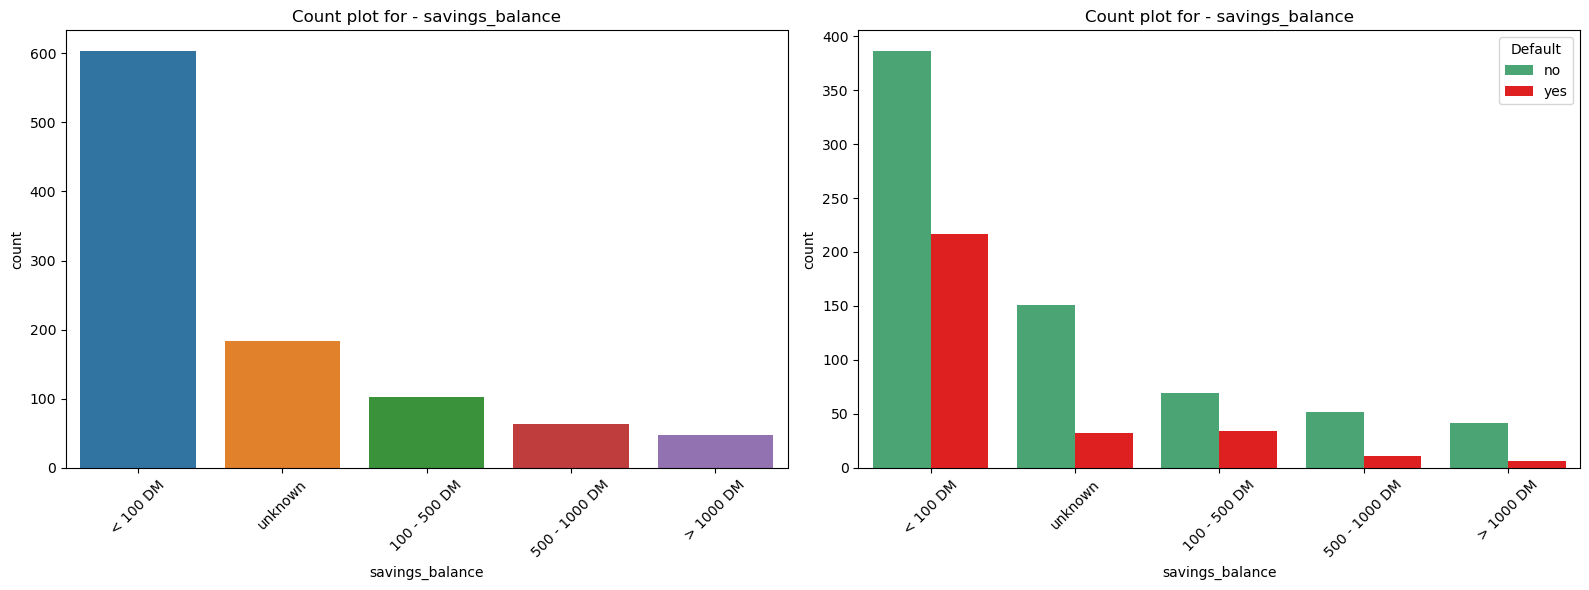

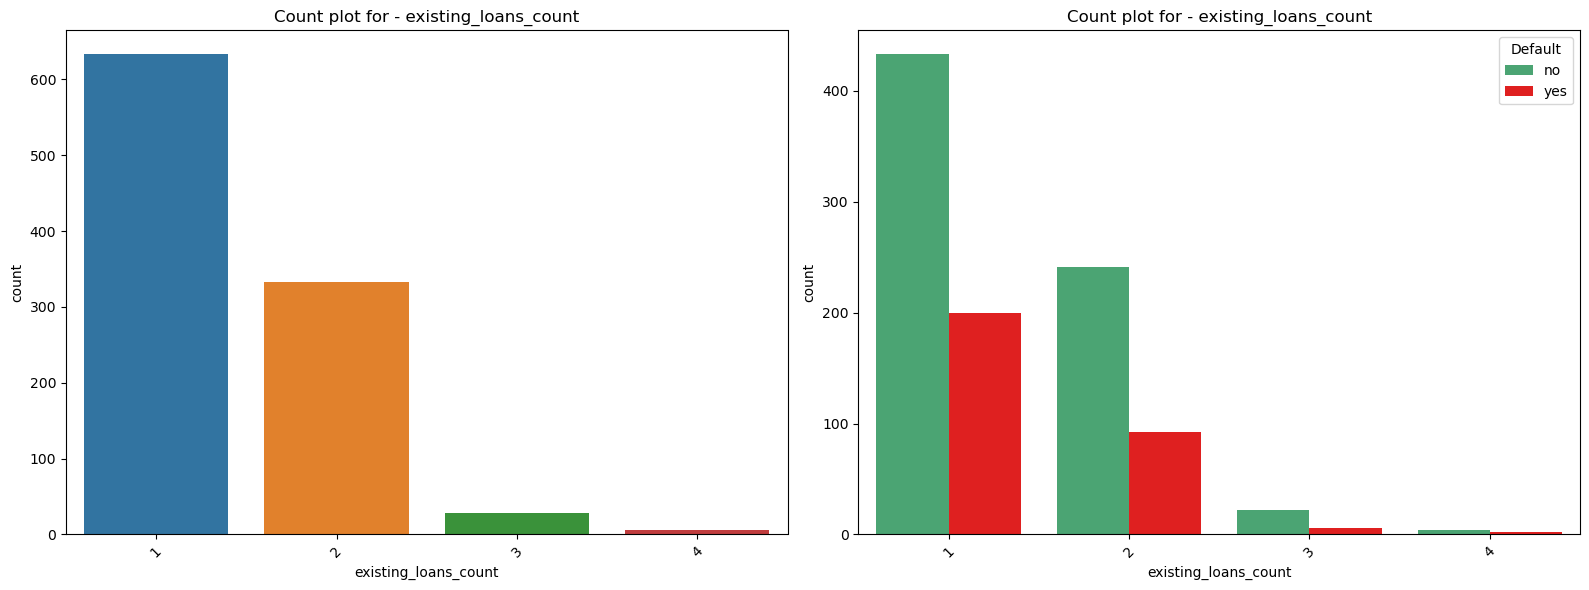

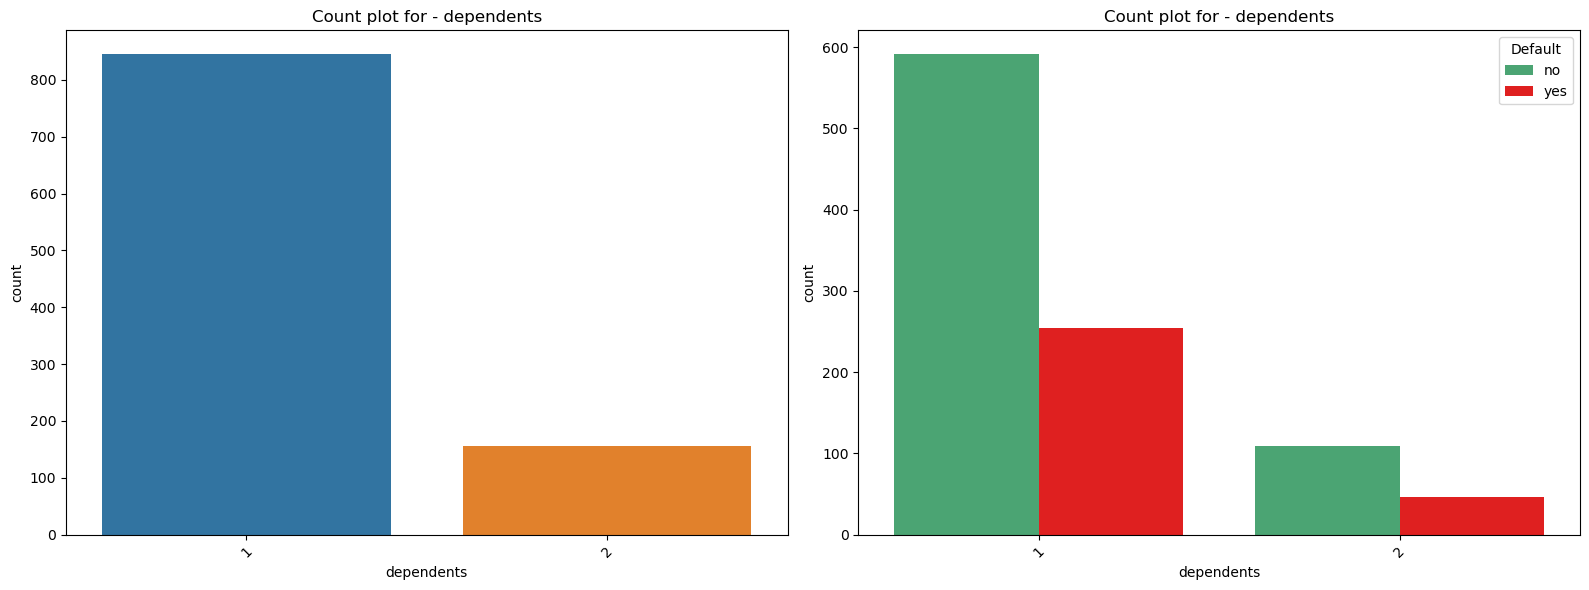

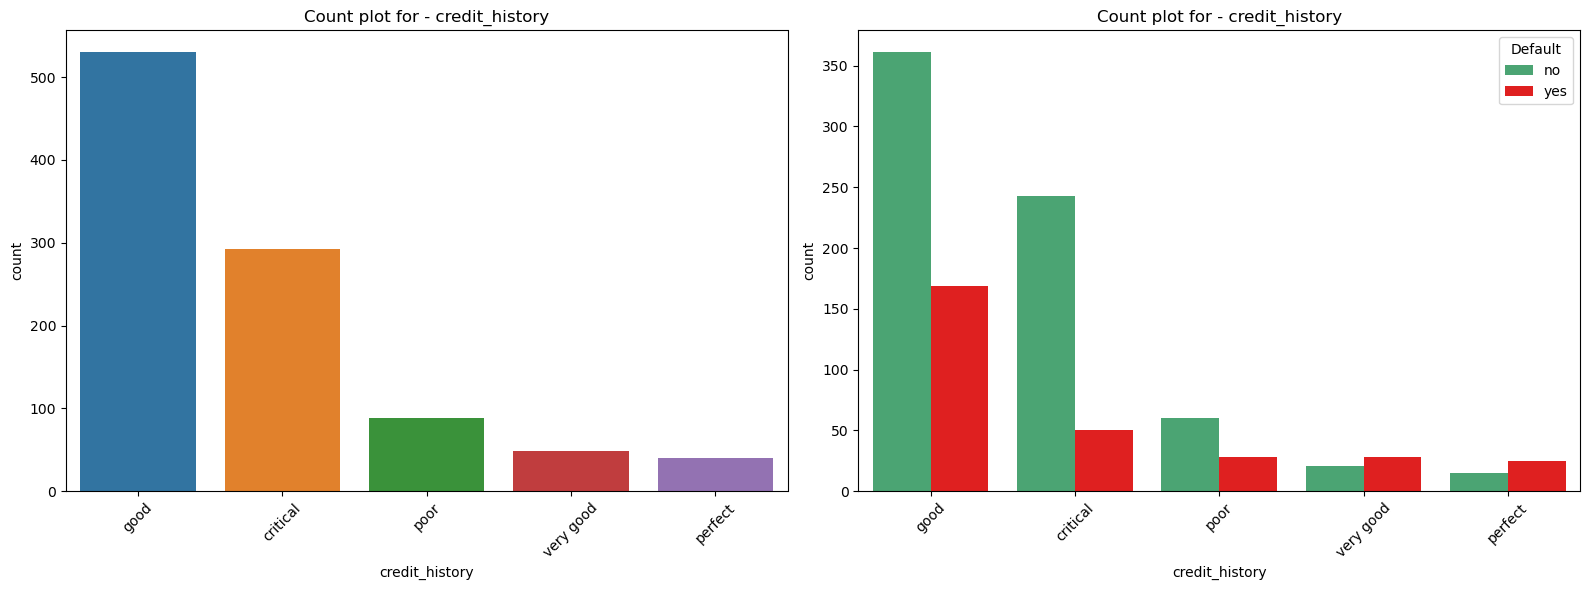

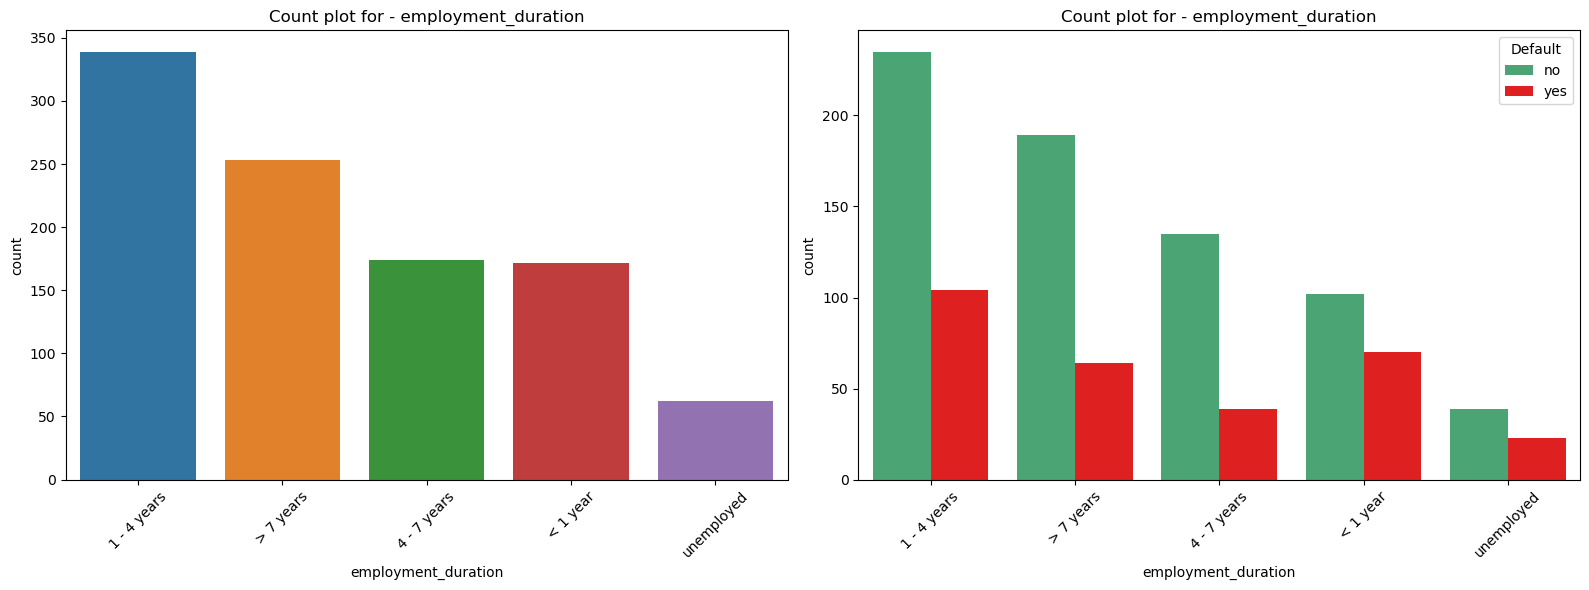

In [17]:
SelectedCol = Datavis[['months_loan_duration', 'percent_of_income','years_at_residence', 'checking_balance','savings_balance','existing_loans_count','dependents', 'credit_history', 'employment_duration']]
for sel in SelectedCol.columns:
    plt.figure(figsize=(16, 6))
    
    #Count plot without hue='default' (sort by descending order)
    plt.subplot(1, 2, 1)  # First subplot
    sns.countplot(data=Datavis, x=sel,
                  order=Datavis[sel].value_counts().index)
    plt.title(f'Count plot for - {sel}')
    plt.xticks(rotation=45)
    
     #Count plot with hue='default' (sort by descending order)
    plt.subplot(1, 2, 2)  # Second subplot
    sns.countplot(data=Datavis, x=sel, hue='default',
                  order=Datavis[sel].value_counts().index,
                  palette={'yes': 'red', 'no': 'mediumseagreen'})
    plt.title(f'Count plot for - {sel}')
    plt.xticks(rotation=45)
    plt.legend(title='Default', loc='upper right')
    plt.tight_layout()
    plt.show()

# Exploring Machine Learning Models

**Spliting the data to 80 - 20 with stratification**

In [18]:
random_seed = 42
X = ProcessedBankData.drop(['default'], axis=1)
y = ProcessedBankData['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

**Initialize StandardScaler and fit-transform on the training and test data**

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Let's dive into some of the ML Models to see what serves us best in this situation

### Model 1: RandomForestClassifier

In [20]:
RF = RandomForestClassifier(random_state=random_seed)
RF.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [21]:
RFPredYtest = RF.predict(X_test_scaled)
print("Classification Report of RandomForest (test) :\n", classification_report(y_test, RFPredYtest))
print("Confusion Matrix  of RandomForest (test) :\n", confusion_matrix(y_test, RFPredYtest))

Classification Report of RandomForest (test) :
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       140
           1       0.67      0.52      0.58        60

    accuracy                           0.78       200
   macro avg       0.74      0.70      0.72       200
weighted avg       0.77      0.78      0.77       200

Confusion Matrix  of RandomForest (test) :
 [[125  15]
 [ 29  31]]


In [22]:
RFPredYtrain = RF.predict(X_train_scaled)
print("Classification Report of RandomForest (train) :\n", classification_report(y_train, RFPredYtrain))
print("Confusion Matrix  of RandomForest (train) :\n", confusion_matrix(y_train, RFPredYtrain))

Classification Report of RandomForest (train) :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       560
           1       1.00      1.00      1.00       240

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Confusion Matrix  of RandomForest (train) :
 [[560   0]
 [  0 240]]


**Understanding the feature importance**

In [23]:
feature_importances = RF.feature_importances_

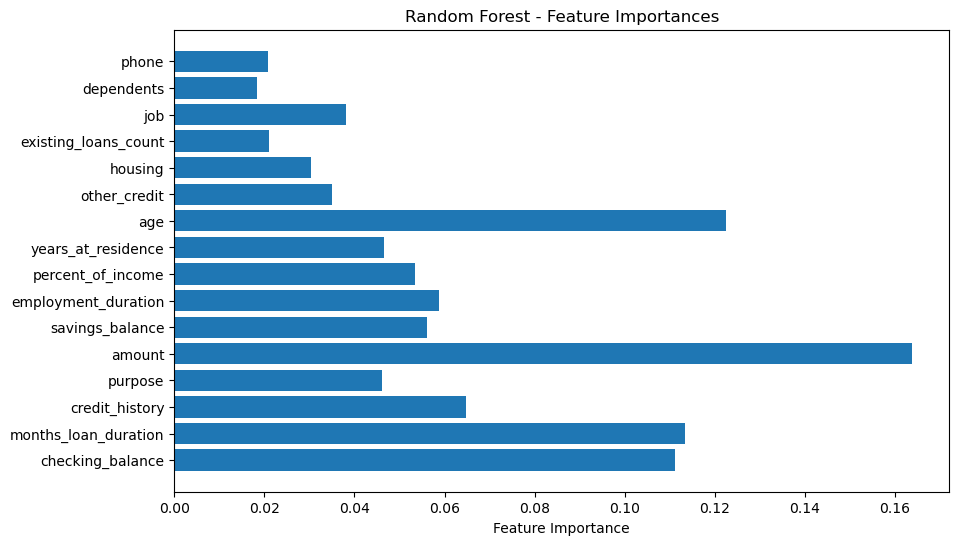

checking_balance: 0.11123698504016537
months_loan_duration: 0.11337589436514485
credit_history: 0.06472097887162084
purpose: 0.04602681872047926
amount: 0.1638481087671423
savings_balance: 0.05609609842018609
employment_duration: 0.058671250941295786
percent_of_income: 0.05345301676602596
years_at_residence: 0.046549654267339834
age: 0.12255556375179033
other_credit: 0.03493662569007795
housing: 0.030414449061785743
existing_loans_count: 0.020947250206278283
job: 0.038064071127540226
dependents: 0.01830896847382024
phone: 0.020794265529306924


In [24]:
feature_names = list(X_train.columns)
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), feature_importances, align="center")
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importances")
plt.show()

for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

**Checking how well the model fits**

In [25]:
k_folds = 5  
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(RF, X, y, cv=kf, scoring='accuracy')
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())
print("Standard deviation:", cross_val_results.std())

Cross-validation results: [0.77  0.76  0.715 0.76  0.79 ]
Mean accuracy: 0.759
Standard deviation: 0.02457641145488904


### Model 2: LogisticRegression

In [26]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
LRPredYtrain = LR.predict(X_train_scaled)
print("Classification Report of LogisticRegression (train) :\n", classification_report(y_train, LRPredYtrain))
print("Confusion Matrix  of LogisticRegression (train) :\n", confusion_matrix(y_train,LRPredYtrain))

Classification Report of LogisticRegression (train) :
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       560
           1       0.64      0.46      0.53       240

    accuracy                           0.76       800
   macro avg       0.71      0.67      0.69       800
weighted avg       0.75      0.76      0.75       800

Confusion Matrix  of LogisticRegression (train) :
 [[497  63]
 [130 110]]


In [28]:
LRPredYtest = LR.predict(X_test_scaled)
print("Classification Report of LogisticRegression (test) :\n", classification_report(y_test, LRPredYtest))
print("Confusion Matrix  of LogisticRegression (test) :\n", confusion_matrix(y_test,LRPredYtest))

Classification Report of LogisticRegression (test) :
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       140
           1       0.67      0.52      0.58        60

    accuracy                           0.78       200
   macro avg       0.74      0.70      0.72       200
weighted avg       0.77      0.78      0.77       200

Confusion Matrix  of LogisticRegression (test) :
 [[125  15]
 [ 29  31]]


**Checking how well the model fits**

In [29]:
k_folds = 5  
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(LR, X, y, cv=kf, scoring='accuracy')
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())
print("Standard deviation:", cross_val_results.std())

Cross-validation results: [0.77  0.76  0.705 0.755 0.795]
Mean accuracy: 0.7569999999999999
Standard deviation: 0.02942787793912435


### Model 3: QuadraticDiscriminantAnalysis

In [30]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train_scaled, y_train)

QuadraticDiscriminantAnalysis()

In [31]:
QDAPredYtrain = QDA.predict(X_train_scaled)
print("Classification Report of QuadraticDiscriminantAnalysis (train):\n", classification_report(y_train,QDAPredYtrain ))
print("Confusion Matrix  of QuadraticDiscriminantAnalysis (train):\n", confusion_matrix(y_train,QDAPredYtrain))

Classification Report of QuadraticDiscriminantAnalysis (train):
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       560
           1       0.65      0.55      0.59       240

    accuracy                           0.78       800
   macro avg       0.73      0.71      0.72       800
weighted avg       0.77      0.78      0.77       800

Confusion Matrix  of QuadraticDiscriminantAnalysis (train):
 [[490  70]
 [109 131]]


In [32]:
QDAPredYtest = QDA.predict(X_test_scaled)
print("Classification Report of QuadraticDiscriminantAnalysis(test) :\n", classification_report(y_test,QDAPredYtest ))
print("Confusion Matrix  of QuadraticDiscriminantAnalysis (test):\n", confusion_matrix(y_test,QDAPredYtest))

Classification Report of QuadraticDiscriminantAnalysis(test) :
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       140
           1       0.65      0.60      0.63        60

    accuracy                           0.79       200
   macro avg       0.74      0.73      0.74       200
weighted avg       0.78      0.79      0.78       200

Confusion Matrix  of QuadraticDiscriminantAnalysis (test):
 [[121  19]
 [ 24  36]]


**Checking how well the model fits**

In [33]:
k_folds = 5  
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(QDA, X, y, cv=kf, scoring='accuracy')
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())
print("Standard deviation:", cross_val_results.std())

Cross-validation results: [0.78  0.745 0.69  0.755 0.76 ]
Mean accuracy: 0.7459999999999999
Standard deviation: 0.030232432915661973


### Model 4: KNeighborsClassifier

In [34]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
KNNPredYtest = KNN.predict(X_test_scaled)
print("Classification Report of KNeighborsClassifier (test):\n", classification_report(y_test,KNNPredYtest ))
print("Confusion Matrix  of KNeighborsClassifier (test):\n", confusion_matrix(y_test,KNNPredYtest))

Classification Report of KNeighborsClassifier (test):
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       140
           1       0.58      0.47      0.52        60

    accuracy                           0.74       200
   macro avg       0.69      0.66      0.67       200
weighted avg       0.73      0.74      0.73       200

Confusion Matrix  of KNeighborsClassifier (test):
 [[120  20]
 [ 32  28]]


In [36]:
KNNPredYtrain = KNN.predict(X_train_scaled)
print("Classification Report of KNeighborsClassifier (train) :\n", classification_report(y_train,KNNPredYtrain ))
print("Confusion Matrix  of KNeighborsClassifier (train) :\n", confusion_matrix(y_train,KNNPredYtrain))

Classification Report of KNeighborsClassifier (train) :
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       560
           1       0.83      0.64      0.72       240

    accuracy                           0.85       800
   macro avg       0.84      0.79      0.81       800
weighted avg       0.85      0.85      0.85       800

Confusion Matrix  of KNeighborsClassifier (train) :
 [[528  32]
 [ 86 154]]


**Checking how well the model fits:**

In [37]:
k_folds = 5  
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(KNN, X, y, cv=kf, scoring='accuracy')
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())
print("Standard deviation:", cross_val_results.std())

Cross-validation results: [0.625 0.625 0.615 0.605 0.625]
Mean accuracy: 0.619
Standard deviation: 0.008000000000000007


### Model 5: GradientBoostingClassifier

In [38]:
GB = GradientBoostingClassifier(random_state=random_seed)
GB.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [39]:
GBPredYtest = GB.predict(X_test_scaled)


print("Classification Report of GradientBoostingClassifier (test):\n", classification_report(y_test,GBPredYtest ))
print("Confusion Matrix  of GradientBoostingClassifier (test) :\n", confusion_matrix(y_test,GBPredYtest))

Classification Report of GradientBoostingClassifier (test):
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       140
           1       0.64      0.53      0.58        60

    accuracy                           0.77       200
   macro avg       0.73      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200

Confusion Matrix  of GradientBoostingClassifier (test) :
 [[122  18]
 [ 28  32]]


In [40]:
GBPredYtrain = GB.predict(X_train_scaled)


print("Classification Report of GradientBoostingClassifier  (train):\n", classification_report(y_train,GBPredYtrain ))
print("Confusion Matrix  of GradientBoostingClassifier (train):\n", confusion_matrix(y_train,GBPredYtrain))

Classification Report of GradientBoostingClassifier  (train):
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       560
           1       0.90      0.72      0.80       240

    accuracy                           0.89       800
   macro avg       0.89      0.84      0.86       800
weighted avg       0.89      0.89      0.89       800

Confusion Matrix  of GradientBoostingClassifier (train):
 [[540  20]
 [ 67 173]]


**Checking how well the model fits**

In [41]:
k_folds = 9  
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(GB, X, y, cv=kf, scoring='accuracy')
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())
print("Standard deviation:", cross_val_results.std())

Cross-validation results: [0.77678571 0.72072072 0.74774775 0.79279279 0.73873874 0.71171171
 0.81081081 0.74774775 0.79279279]
Mean accuracy: 0.7599831974831974
Standard deviation: 0.03272974835112599


### MODEL 6: LinearDiscriminantAnalysis

In [42]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [43]:
LDAPredYtest = LDA.predict(X_test_scaled)

print("Classification Report of LinearDiscriminantAnalysis (test) :\n", classification_report(y_test,LDAPredYtest ))
print("Confusion Matrix  of LinearDiscriminantAnalysis (test) :\n", confusion_matrix(y_test,LDAPredYtest))

Classification Report of LinearDiscriminantAnalysis (test) :
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       140
           1       0.65      0.52      0.57        60

    accuracy                           0.77       200
   macro avg       0.73      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200

Confusion Matrix  of LinearDiscriminantAnalysis (test) :
 [[123  17]
 [ 29  31]]


In [44]:
LDAPredYtrain = LDA.predict(X_train_scaled)

print("Classification Report of LinearDiscriminantAnalysis (train) :\n", classification_report(y_train,LDAPredYtrain ))
print("Confusion Matrix  of LinearDiscriminantAnalysis (train) :\n", confusion_matrix(y_train,LDAPredYtrain))

Classification Report of LinearDiscriminantAnalysis (train) :
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       560
           1       0.65      0.47      0.54       240

    accuracy                           0.76       800
   macro avg       0.72      0.68      0.69       800
weighted avg       0.75      0.76      0.75       800

Confusion Matrix  of LinearDiscriminantAnalysis (train) :
 [[498  62]
 [127 113]]


**Checking how well the model fits**

In [45]:
k_folds = 9  
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(LDA, X, y, cv=kf, scoring='accuracy')
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())
print("Standard deviation:", cross_val_results.std())

Cross-validation results: [0.77678571 0.72972973 0.72072072 0.8018018  0.72072072 0.65765766
 0.8018018  0.78378378 0.71171171]
Mean accuracy: 0.7449681824681825
Standard deviation: 0.046087280293524976


### MODEL 7: AdaBoostClassifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
Adaboost = AdaBoostClassifier(random_state=42)
Adaboost.fit(X_train_scaled, y_train)

AdaBoostClassifier(random_state=42)

In [48]:
AdaboostYtest = Adaboost.predict(X_test_scaled)

print("Classification Report of AdaBoostClassifier (test) :\n", classification_report(y_test,AdaboostYtest ))
print("Confusion Matrix  of AdaBoostClassifier (test) :\n", confusion_matrix(y_test,AdaboostYtest))

Classification Report of AdaBoostClassifier (test) :
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       140
           1       0.58      0.53      0.56        60

    accuracy                           0.74       200
   macro avg       0.69      0.68      0.69       200
weighted avg       0.74      0.74      0.74       200

Confusion Matrix  of AdaBoostClassifier (test) :
 [[117  23]
 [ 28  32]]


In [49]:
AdaboostYtrain = Adaboost.predict(X_train_scaled)

print("Classification Report of AdaBoostClassifier (train) :\n", classification_report(y_train,AdaboostYtrain ))
print("Confusion Matrix  of AdaBoostClassifier (train) :\n", confusion_matrix(y_train,AdaboostYtrain))

Classification Report of AdaBoostClassifier (train) :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       560
           1       0.70      0.56      0.62       240

    accuracy                           0.80       800
   macro avg       0.76      0.73      0.74       800
weighted avg       0.79      0.80      0.79       800

Confusion Matrix  of AdaBoostClassifier (train) :
 [[501  59]
 [105 135]]


**Checking how well the model fits**

In [50]:
k_folds = 9  
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(Adaboost, X, y, cv=kf, scoring='accuracy')
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())
print("Standard deviation:", cross_val_results.std())

Cross-validation results: [0.79464286 0.7027027  0.72072072 0.79279279 0.67567568 0.67567568
 0.78378378 0.72072072 0.71171171]
Mean accuracy: 0.7309362934362934
Standard deviation: 0.04492032180372101


**We are in the last leg, now have to check which model is the best**

In [51]:
conf_matrix = confusion_matrix(y_train, LRPredYtrain)


def plot_confusion_matrix(y_true, y_pred, class_names=None, figsize=(6, 4), cmap='Blues'):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix Heatmap')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

**Plotting all confusion matrix**

LogisticRegression - Confusion Matrix (Test set)


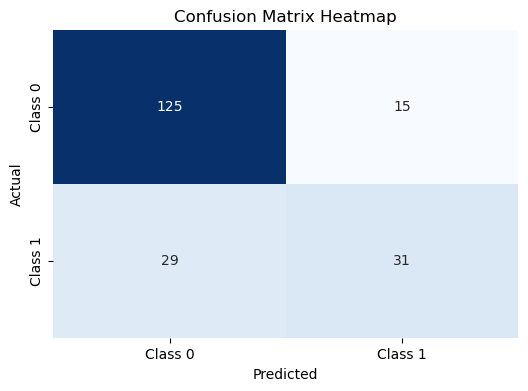

None


In [52]:
print("LogisticRegression - Confusion Matrix (Test set)")
print(plot_confusion_matrix(y_test,LRPredYtest,class_names=['Class 0', 'Class 1']))

 RandomForestClassifier - Confusion Matrix (Test set)


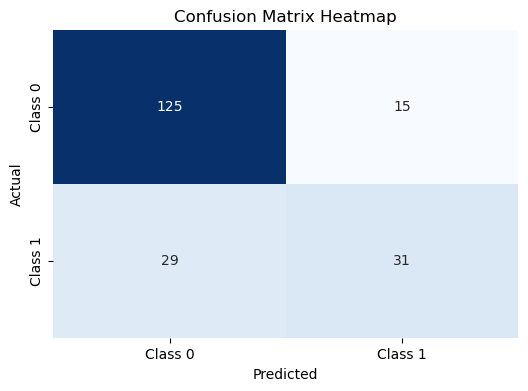

None


In [53]:
print(" RandomForestClassifier - Confusion Matrix (Test set)")
print(plot_confusion_matrix(y_test, RFPredYtest,class_names=['Class 0', 'Class 1']))

QuadraticDiscriminantAnalysis - Confusion Matrix (Test set)


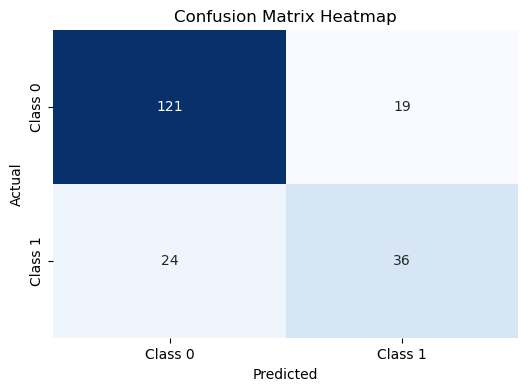

None


In [54]:
print("QuadraticDiscriminantAnalysis - Confusion Matrix (Test set)")
print(plot_confusion_matrix(y_test,QDAPredYtest,class_names=['Class 0', 'Class 1']))

KNeighborsClassifier - Confusion Matrix (Test set)


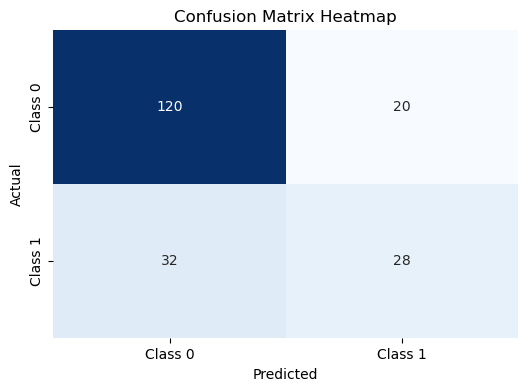

None


In [55]:
print("KNeighborsClassifier - Confusion Matrix (Test set)")
print(plot_confusion_matrix(y_test,KNNPredYtest,class_names=['Class 0', 'Class 1']))

GradientBoostingClassifier - Confusion Matrix (Test set)


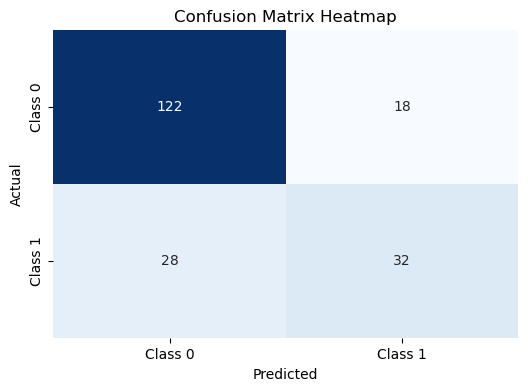

None


In [56]:
print("GradientBoostingClassifier - Confusion Matrix (Test set)")
print(plot_confusion_matrix(y_test,GBPredYtest,class_names=['Class 0', 'Class 1']))

LinearDiscriminantAnalysis - Confusion Matrix (Test set)


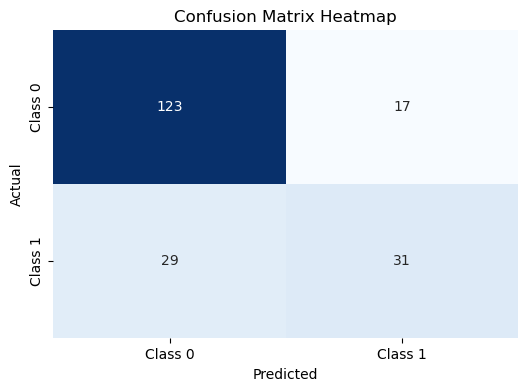

None


In [57]:
print("LinearDiscriminantAnalysis - Confusion Matrix (Test set)")
print(plot_confusion_matrix(y_test,LDAPredYtest,class_names=['Class 0', 'Class 1']))

 AdaBoostClassifier - Confusion Matrix (Test set)


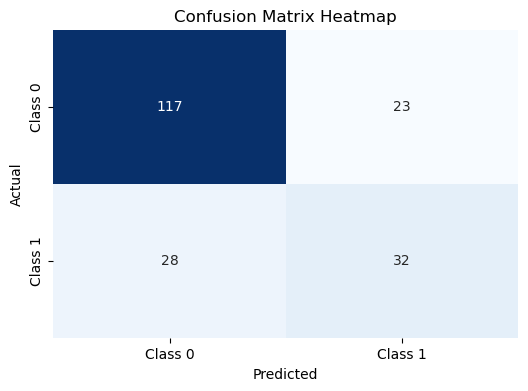

None


In [58]:
print(" AdaBoostClassifier - Confusion Matrix (Test set)")
print(plot_confusion_matrix(y_test,AdaboostYtest,class_names=['Class 0', 'Class 1']))

**Insights:**

- Upon observation this dataset has an imbalanced class classification problem.

# Comparing  The Model Performance

- Adapted Precision Recall curve, Area Under Curve, Receiver Operating Characteristic curve

In [59]:
ModelNames = ['Logistic Regression', 'K-Nearest Neighbors',
               'Quadratic Discriminant Analysis', 'Random Forest', 'Gradient Boosting',
               'AdaBoost', 'Linear Discriminant Analysis']

FittedModels = [LR, KNN,  QDA, RF, GB,
                 Adaboost, LDA]

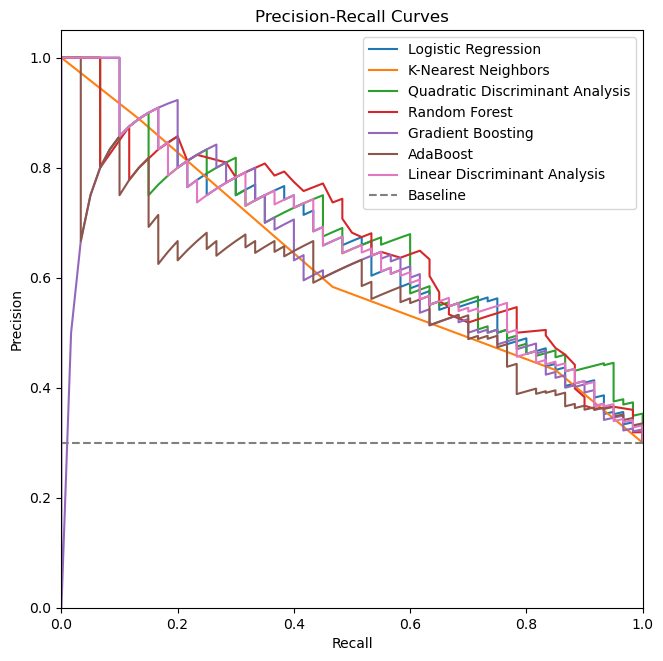

AUC-PR Values (Area Under the Curve in a Precision-Recall plot):
                          Model   AUC-PR
                  Random Forest 0.671070
Quadratic Discriminant Analysis 0.661009
            Logistic Regression 0.660227
   Linear Discriminant Analysis 0.658843
            K-Nearest Neighbors 0.620856
              Gradient Boosting 0.616956
                       AdaBoost 0.584090


In [60]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score, f1_score

ModelNames = ['Logistic Regression', 'K-Nearest Neighbors',
               'Quadratic Discriminant Analysis', 'Random Forest', 'Gradient Boosting',
               'AdaBoost', 'Linear Discriminant Analysis']

FittedModels = [LR, KNN, QDA, RF, GB,
                Adaboost, LDA]

prc_data = {}
auc_pr_values = []

for model_name, model in zip(ModelNames, FittedModels):
  
    if hasattr(model, "predict_proba"):
        predicted_probabilities = model.predict_proba(X_test_scaled)[:, 1]
    else:
        predicted_probabilities = model.decision_function(X_test_scaled)

    
    precision, recall, _ = precision_recall_curve(y_test, predicted_probabilities)

    
    auc_pr = auc(recall, precision)
    auc_pr_values.append(auc_pr)

    prc_data[model_name] = {'precision': precision, 'recall': recall}


plt.figure(figsize=(7.5, 7.5))
for model_name in ModelNames:
    plt.plot(prc_data[model_name]['recall'], prc_data[model_name]['precision'], label=model_name)


ratio_positives = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0, 1], [ratio_positives, ratio_positives], linestyle='--', label='Baseline', color='gray')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='upper right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()


auc_pr_df = pd.DataFrame({'Model': ModelNames, 'AUC-PR': auc_pr_values})
auc_pr_df = auc_pr_df.sort_values(by='AUC-PR', ascending=False)

print("AUC-PR Values (Area Under the Curve in a Precision-Recall plot):")
print(auc_pr_df.to_string(index=False))

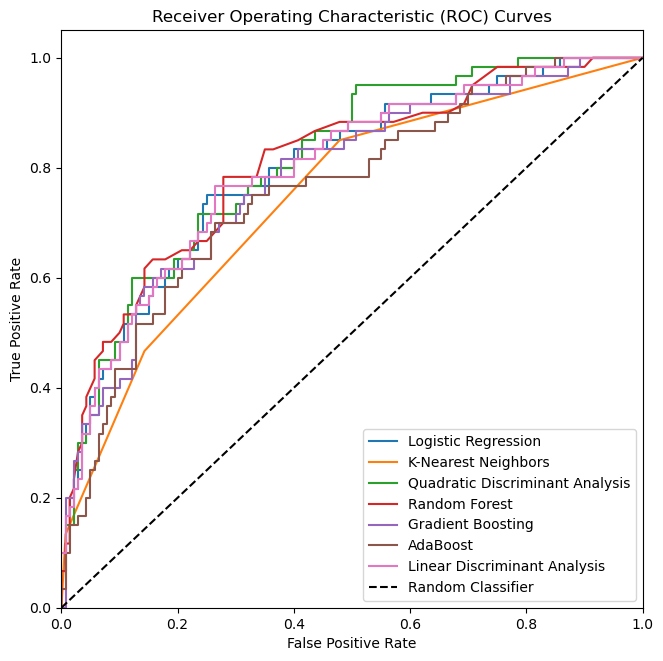

AUC-ROC Values (Area Under the Receiver Operating Characteristic curve):
                          Model  AUC-ROC
Quadratic Discriminant Analysis 0.811429
                  Random Forest 0.806786
            Logistic Regression 0.796429
   Linear Discriminant Analysis 0.796429
              Gradient Boosting 0.782619
                       AdaBoost 0.758929
            K-Nearest Neighbors 0.744524


In [61]:
roc_data = {}
auc_roc_values = []

for model_name, model in zip(ModelNames, FittedModels):
    
    if hasattr(model, "predict_proba"):
        predicted_probabilities = model.predict_proba(X_test_scaled)[:, 1]
    else:
        predicted_probabilities = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, predicted_probabilities)
    auc_roc = roc_auc_score(y_test, predicted_probabilities)
    auc_roc_values.append(auc_roc)

    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr}


plt.figure(figsize=(7.5, 7.5))
for model_name in ModelNames:
    plt.plot(roc_data[model_name]['fpr'], roc_data[model_name]['tpr'], label=model_name)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

auc_roc_df = pd.DataFrame({'Model': ModelNames, 'AUC-ROC': auc_roc_values})

auc_roc_df = auc_roc_df.sort_values(by='AUC-ROC', ascending=False)

print("AUC-ROC Values (Area Under the Receiver Operating Characteristic curve):")
print(auc_roc_df.to_string(index=False))


In [62]:
np.random.seed(42)

# Create a dummy dataset similar to the original
dummy_data = pd.DataFrame({
    'checking_balance': np.random.choice([0, 1, 2, 3], size=1000),
    'months_loan_duration': np.random.randint(12, 72, size=1000),
    'credit_history': np.random.choice([0, 1, 2, 3, 4], size=1000),
    'purpose': np.random.choice([0, 1, 2, 3, 4], size=1000),
    'amount': np.random.randint(1000, 35000, size=1000),
    'savings_balance': np.random.choice([0, 1, 2], size=1000),
    'employment_duration': np.random.choice([0, 1, 2, 3, 4], size=1000),
    'percent_of_income': np.random.randint(1, 10, size=1000),
    'years_at_residence': np.random.randint(1, 10, size=1000),
    'age': np.random.randint(18, 70, size=1000),
    'other_credit': np.random.choice([0, 1, 2], size=1000),
    'housing': np.random.choice([0, 1, 2], size=1000),
    'existing_loans_count': np.random.randint(0, 5, size=1000),
    'job': np.random.choice([0, 1, 2, 3], size=1000),
    'dependents': np.random.randint(0, 3, size=1000),
    'phone': np.random.choice([0, 1], size=1000),

})
dummy_data.head()

checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 2                    65               0        1    6276   
1                 3                    28               2        4   20008   
2                 0                    20               3        4    6738   
3                 2                    44               3        1   33402   
4                 2                    64               4        3    6793   

   savings_balance  employment_duration  percent_of_income  \
0                2                    0                  9   
1                2                    3                  9   
2                1                    3                  2   
3                0                    2                  8   
4                2                    0                  5   

   years_at_residence  age  other_credit  housing  existing_loans_count  job  \
0                   4   51             0        1                     2    3   
1                   5   30             0        0                     0    1   
2                   3   31             2        1                     2    2   
3                   9   28             0        1                     1    0   
4                   4   45             1        0                     3    2   

   dependents  phone  
0           0      0  
1           2      1  
2           2      1  
3           2      0  
4           1      0

In [63]:
RF.predict(dummy_data)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,

**Insights**

- This is the predicted array of defaults from my models. 